In [1]:
# import the packages needed for plotting
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#filename = 'c:\Users\Emma Jones\OneDrive - University of Cambridge\Documents\My work\cambridge\Year 2\Rayner lab\Data\Optical tweezers\Data for plotting\Optical_tweezer_data_plot.xlsx'
filename = r"C:/Users/Emma Jones/OneDrive - University of Cambridge/Documents/My work/cambridge/Year 2/Rayner lab/Data/Optical tweezers/Data for plotting/Optical_tweezer_data_plot_ATTACHMENTS.xlsx"
ROW_COUNT = 36

In [2]:
# read 
df_force_raw = pd.read_excel(
    filename, 
    header=1,
    usecols='A:CV',
    index_col=0,
    nrows=ROW_COUNT,
)
df_force_raw.index = df_force_raw.index.str.strip() # remove whitespace

df_force_raw # display dataframe

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
NF54,5.143278,39.521314,30.079322,11.294584,16.947714,22.515220,23.785958,35.532014,34.998810,14.217476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NF54 old,11.331558,20.180020,57.562680,2.047192,47.357856,21.476056,3.810268,12.115796,24.883502,52.604272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NF54 new,5.143278,39.521314,30.079322,11.294584,16.947714,22.515220,23.785958,35.532014,34.998810,14.217476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3D7 (viola),39.200000,22.130000,35.270000,24.600000,57.200000,39.620000,56.110000,42.130000,63.340000,51.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3D7,72.634450,42.210686,35.448336,56.762874,23.243024,25.912936,45.119956,22.624196,27.063022,44.061332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Glut,78.153306,31.464874,47.832680,42.130900,82.232122,25.823420,54.867470,1.173438,9.354422,11.880330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anti-Basigin,16.655814,8.564346,26.728310,28.717122,56.973042,16.463160,56.515732,9.305772,32.400900,34.703018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anti-CD55,19.259562,1.747508,6.684510,33.663854,45.394342,8.982736,35.993216,17.967418,18.961824,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anti-GYPA,12.643162,2.344930,9.691080,10.500616,12.117742,11.545618,15.507674,24.225754,15.495998,11.448318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heparin 50,21.248374,29.174432,38.367336,32.982754,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_freq_raw = pd.read_excel(
    filename, 
    header=0,
    usecols='A,CY:DP',
    index_col=0,
    nrows=ROW_COUNT,
).dropna(axis=1, how='all').dropna(axis=0, how='all')

df_freq_raw.index = df_freq_raw.index.str.strip() # remove whitespace

df_freq_raw # display dataframe

,n,mean,SEM,Normal Gausian distributed,sig diff to NF54,Unnamed: 107,Number egresses measured,Positioned,Attached,Percentage,percentage of attachment that were measureable,Mean attached per egress,SEM of atatched per egress,Invasion efficeny (Flow),SEM.1
NF54,85.0,24.177516,1.540224,Yes,NA,NaN,87.0,557.0,104.0,18.671454,81.730769,19.056369,2.669852,100.000000,NaN
NF54 old,28.0,28.610370,3.043996,NaN,NaN,NaN,NaN,224.0,49.0,21.875000,57.142857,23.987909,4.250059,NaN,NaN
NF54 new,53.0,22.294331,1.811081,NaN,NaN,NaN,NaN,374.0,65.0,17.379679,81.538462,15.808519,2.963123,NaN,NaN
3D7 (viola),21.0,42.536810,3.432459,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3D7,23.0,35.924768,3.054521,Yes,No = 0.0993,NaN,12.0,92.0,25.0,27.173913,92.000000,30.463980,9.209475,NaN,NaN
Glut,21.0,28.143145,5.434934,No,No = 0.4609,NaN,NaN,84.0,25.0,29.761905,84.000000,NaN,NaN,NaN,NaN
Anti-Basigin,31.0,30.847866,3.072590,Yes,No = 0.6077,NaN,29.0,175.0,31.0,17.714286,100.000000,15.541542,3.242236,22.970624,3.636610
Anti-CD55,9.0,20.961663,4.882831,Yes,No = 0.2118,NaN,19.0,134.0,10.0,7.462687,90.000000,8.231922,2.662873,82.120807,6.103501
Anti-GYPA,11.0,14.209692,2.286176,No,Yes = 0.0067,NaN,40.0,251.0,12.0,4.780876,91.666667,5.165584,2.264832,55.541310,7.381862
Heparin 50,4.0,30.443224,3.598563,Yes,No = 0.8258,NaN,NaN,29.0,3.0,10.344828,133.333333,7.777778,4.843221,24.710715,9.705865


In [4]:
conditions_to_plot = [
    ## All
    # 'NF54',
    # '3D7',
    # 'cKOMSP1 DMSO',
    # 'cKOMSP1 Rap',
    # 'Neuraminidase',
    # 'Anti-GYPA',
    # 'Anti-GYPC',
    # 'KOP230P',
    # 'KOPfs25',
#     'KOEBA140',
#    'KOEBA175',
#     'KOEBA181',
#     'KORH1',
#     'KORH2a',
#     'KORH4',
#    'KOEBA175+Anti-GYPA',
    # 'Anti-Basigin', 
    # 'R1',
    # 'cKOAMA1 DMSO', 
    # 'cKOAMA1 Rap',
    # 'cKOGAP45 DMSO',
    # 'cKOGAP45 Rap',
    #'Heparin 50',	


    # '3D7 (viola)',
    #'Anti-CD55',
    # 'Anti-CR1 ab25',
    # 'Anti-CR1 ABIN',
    # 'NF54 old',
    # 'NF54 new',
    # 'Glut',

## Figure 1c/d - wild-type
# 'NF54',
# '3D7',

## Figure 1f/g
    # 'cKOMSP1 DMSO',
    # 'cKOMSP1 Rap',
    #  'NF54',
    #  'Neuraminidase',
    # 'Anti-GYPA',
    # 'Anti-GYPC',
    # 'Anti-Basigin', 
    # 'R1',
    #  'cKOGAP45 DMSO',
    # 'cKOGAP45 Rap',  
    # 'cKOAMA1 DMSO', 
    #  'cKOAMA1 Rap',


    ## KO lines - Figure 4  
    # 'NF54',
    # 'KOP230P',
    # 'KOPfs25',
    # 'KOEBA140',
    # 'KOEBA175',
    # 'KOEBA181',
    # 'KORH1',
    # 'KORH2a',
    # 'KORH4',
    # 'KOEBA175+Anti-GYPA',

    ## EBA175 
    # 'NF54',
    # 'Anti-GYPA',
    # 'KOEBA175',
    # 'KOEBA175+Anti-GYPA',
    
    # 'NF54',
    # 'R1',
    # '3D7',
    # 'cKOAMA1 DMSO',
    # 'cKOAMA1 Rap',
    
    # 'NF54 1',
    # 'NF54 2',
    # 'NF54 3',
    # 'NF54 5',
    # 'NF54 87',
    # 'NF54 125',
    # 'NF54 128',
    # 'NF54 132',


## ordered by invasion 
    'cKOMSP1 DMSO',
    'cKOMSP1 Rap',
    'cKOGAP45 DMSO',
    'cKOGAP45 Rap',
    'NF54',
    'Neuraminidase',
    'Anti-GYPA',
    'Anti-GYPC',
    'KOP230P',
    'KOPfs25',
    'KOEBA140',
    'KOEBA175',
    'KOEBA181',
    'KORH1',
    'KORH2a',
    'KORH4',
    'Anti-Basigin', 
    'R1',
    'cKOAMA1 DMSO', 
    'cKOAMA1 Rap',



]




colors_light = {
    'NF54': '#829AA3',
    'Heparin 50':'#829AA3',
    
    '3D7':'#B9BDC5',
    '3D7 (viola)': '#B9BDC5',

    'KOP230P': '#91b1be',
    'KOPfs25': '#9fc9d9',

    'KOEBA140': '#DAEBC6',
    'KOEBA181': '#84B06D',
    'KOEBA175': '#C1E2D4',
    'KOEBA175+Anti-GYPA':'#A5D0D4',
    'KORH1': '#F9DA9A',
    'KORH4': '#F3A59B',
    'KORh2a': '#F7CAA1',
    'KORH2a': '#F7CAA1',

    

    'Barseq': '#BEBFBC',

    'cKOMSP1 DMSO':'#B9BDC5',
    'cKOMSP1 Rap':'#FFE3B8',

    'Neuraminidase':'#D6EE96',
    
    'Anti-CD55':'#97B6DA',
    'Anti-GYPA':'#B6E2DF',
    'R1':'#F1AAD1',
    'Anti-GYPC':'#93E1DB',
    'Anti-CR1 ab25':'#DEAC7F',
    'Anti-CR1 ABIN':'#DEAC7F',

    'Anti-Basigin':'#C6C5D3',
   
    
  
    'cKOGAP45 DMSO': '#B9BDC5',
    'cKOGAP45 Rap': '#E5486C',

    'cKOAMA1 DMSO':'#B9BDC5',
    'cKOAMA1 Rap':'#EBD1D9',
    
 
}

colors_dark = {
    'NF54': '#043546',
    'Heparin 50':'#818897',

    '3D7':'#818897',
    '3D7 (viola)': '#818897',

    'KOP230P': '#406a7d',
    'KOPfs25': '#78a3b9',

    'KOEBA140': '#9ECA69',
    'KOEBA181': '#486737',
    'KOEBA175': '#6AB997',
    'KOEBA175+Anti-GYPA':'#04A0AF',
    'KORH1': '#F1AF23',
    'KORH4': '#E8513E',
    'KORh2a': '#ED8626',
    'KORH2a': '#ED8626',


    'Barseq': '#BEBFBC',

    'cKOMSP1 DMSO':'#FFD086',
    'cKOMSP1 Rap':'#FFD086',

    'Neuraminidase':'#ABDC29',
    
    'Anti-CD55':'#97B6DA',
    'Anti-GYPA':'#91D4CF',
    'R1':'#E459A5',
    'Anti-GYPC':'#35BEB4',
    'Anti-CR1 ab25':'#C6545E',
    'Anti-CR1 ABIN':'#C6545E',

    'Anti-Basigin':'#7E7C9C',
   
    
  
    'cKOGAP45 DMSO': '#81132C',
    'cKOGAP45 Rap': '#81132C',

    
    'cKOAMA1 DMSO':'#CC889D',
    'cKOAMA1 Rap':'#CC889D',
}

# Old 
# colors_light = {
#     'NF54': '#829AA3',
#     'NF54 old': '#829AA3',
#     'NF54 new': '#829AA3',
#     'Glut':'#829AA3',
#     'KOEBA140': '#7EB3C1',
#     'KOEBA181': '#9CC3C0',
#     'KOEBA175': '#85A7A7',
#     'KORH1': '#C1C2B1',
#     'KORH4': '#D7E4DD',
#     'KORh2a': '#9ACDB3',
#     'KORH2a': '#9ACDB3',
#     'Barseq': '#BEBFBC',
#     'KOP230P': '#829AA3',
#     'KOPfs25': '#829AA3',
#     '3D7':'#C57380',
#     '3D7 (viola)': '#C57380',
#     'Anti-Basigin':'#ABA9CE',
#     'Anti-CD55':'#97B6DA',
#     'Anti-GYPA':'#B5E2DF',
#     'R1':'#F1AAD1',
#     'Neuraminidase':'#CDEA80',
#     'Anti-GYPC':'#95C3CC',
#     'Anti-CR1 ab25':'#B4E0D4',
#     'Anti-CR1 ABIN':'#B4E0D4',
#     'cKOAMA1 Rap':'#F3C9DA',
#     'cKOAMA1 DMSO':'#829AA3',
#     'KOEBA175+Anti-GYPA':'#4E87A0',
#     'cKOMSP1 DMSO':'#829AA3',
#     'cKOMSP1 Rap':'#F4D0B2',
#     'cKOGAP45 DMSO': '#829AA3',
#     'cKOGAP45 Rap': '#DEAC7F',

# }


#old
# colors_dark = {
#     'NF54': '#043546',
#     'NF54 old': '#043546',
#     'NF54 new': '#043546',
#     'Glut':'#043546',
#     'KOEBA140': '#3F7685',
#     'KOEBA181': '#5F9995',
#     'KOEBA175': '#4B7772',
#     'KORH1': '#78795F',
#     'KORH4': '#6C9A81',
#     'KORh2a': '#30877C',
#     'KORH2a': '#30877C',
#     'Barseq': '#6B777D',
#     'KOP230P': '#122134',
#     'KOPfs25': '#1A175C',
#     '3D7':'#A7144C',
#     '3D7 (viola)': '#A7144C',
#     'Anti-Basigin':'#56529D',
#     'Anti-CD55':'#3A7EB4',
#     'Anti-GYPA':'#6BC4BF',
#     'R1':'#E355A2',
#     'Neuraminidase':'#84BD00',
#     'Anti-GYPC':'#2B8799',
#     'Anti-CR1 ab25':'#3F9A81',
#     'Anti-CR1 ABIN':'#3F9A81',
#     'cKOAMA1 Rap':'#DE5269',
#     'cKOAMA1 DMSO':'#DE5269',
#     'KOEBA175+Anti-GYPA':'#005776',
#     'cKOMSP1 DMSO':'#EBAE7B',
#     'cKOMSP1 Rap':'#EBAE7B',
#     'cKOGAP45 DMSO':'#C87138',
#     'cKOGAP45 Rap':'#C87138',

# }

# only keep conditons we want to plot
df_force = df_force_raw[df_force_raw.index.isin(conditions_to_plot)]
df_freq = df_freq_raw[df_freq_raw.index.isin(conditions_to_plot)]

# reorder conditions to accord with lits
df_force = df_force.reindex(conditions_to_plot)
df_freq = df_freq.reindex(conditions_to_plot)

df_force_plot = df_force.T.stack(dropna=True).reset_index(level=0, name='Detachment force (pN)') # stack forces columnwise
df_force_plot['Condition'] = df_force_plot.index


In [5]:
import matplotlib.colors as mc
import colorsys

def change_saturation(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """

    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

c:\Users\Emma Jones\.conda\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Emma Jones\.conda\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Emma Jones\.conda\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Emma Jones\.conda\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

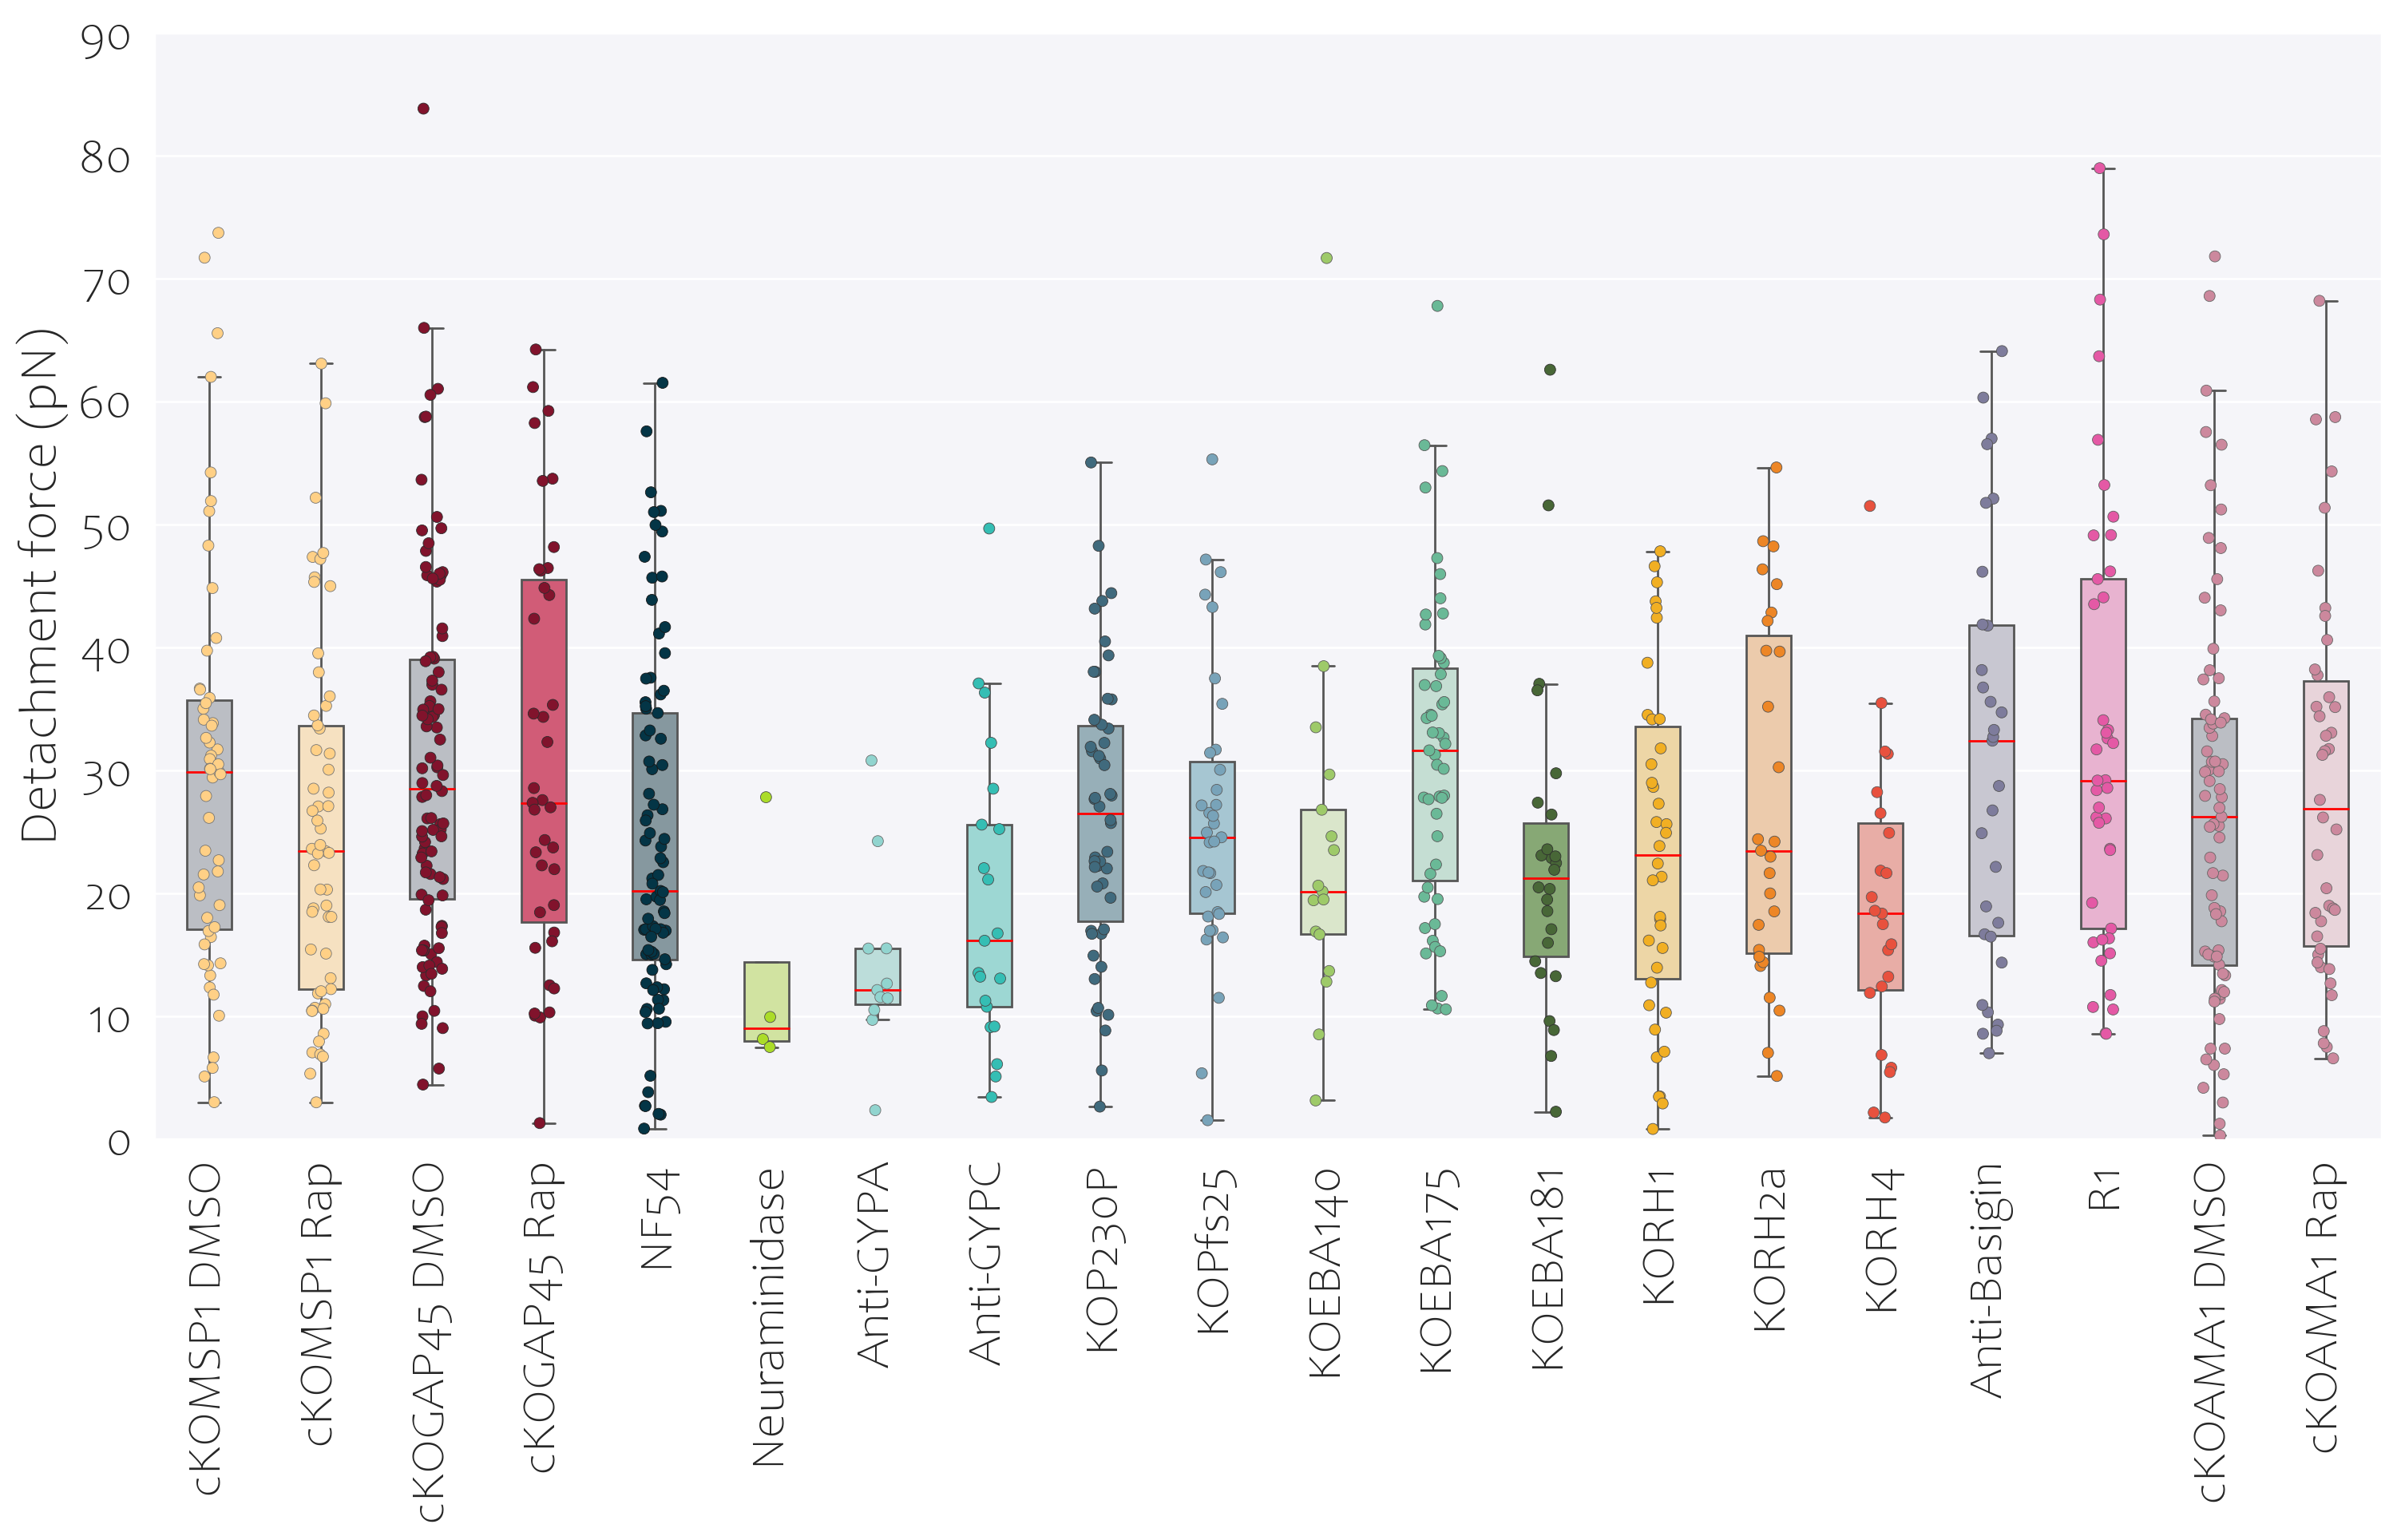

In [16]:
# Plot force 

plt.figure()
## size of plot
# plt.gcf().set_size_inches(4,9)
# plt.gcf().set_size_inches(12,9)
plt.gcf().set_size_inches(15,9)
plt.gcf().set_size_inches(18,9)
#plt.gcf().set_size_inches(18,9)


plt.gcf().set_dpi(200)

sns.set_theme(context='notebook', style='darkgrid', font='Candara', font_scale=2, color_codes=True, rc=None)
sns.set_style(rc = {'axes.facecolor': '#F5F5F9'})
#sns.set_style(rc = {'axes.facecolor': '#FBF9F6'})

ax = sns.boxplot(
    data=df_force_plot, 
    x=df_force_plot.index, 
    y='Detachment force (pN)', 
    order=conditions_to_plot,
    hue=df_force_plot['Condition'], 
    palette=colors_light, 
    #saturation=.5, 
    dodge=False, 
    showfliers=False, 
    width=0.4,
    medianprops={"color": "red"},
    #linewidth=1,
    linewidth=1,
)
plt.xticks(rotation=90)

sns.stripplot(
    data=df_force_plot, 
    x=df_force_plot.index, 
    y='Detachment force (pN)', 
    order=conditions_to_plot,
    jitter=True, 
    linewidth=0.3,
    hue=df_force_plot.index,
    palette=colors_dark,
    
)

plt.ylim((0,90))
plt.legend([],[], frameon=False)

plt.savefig(f'graphs/tweezer attachment force.png', bbox_inches='tight')

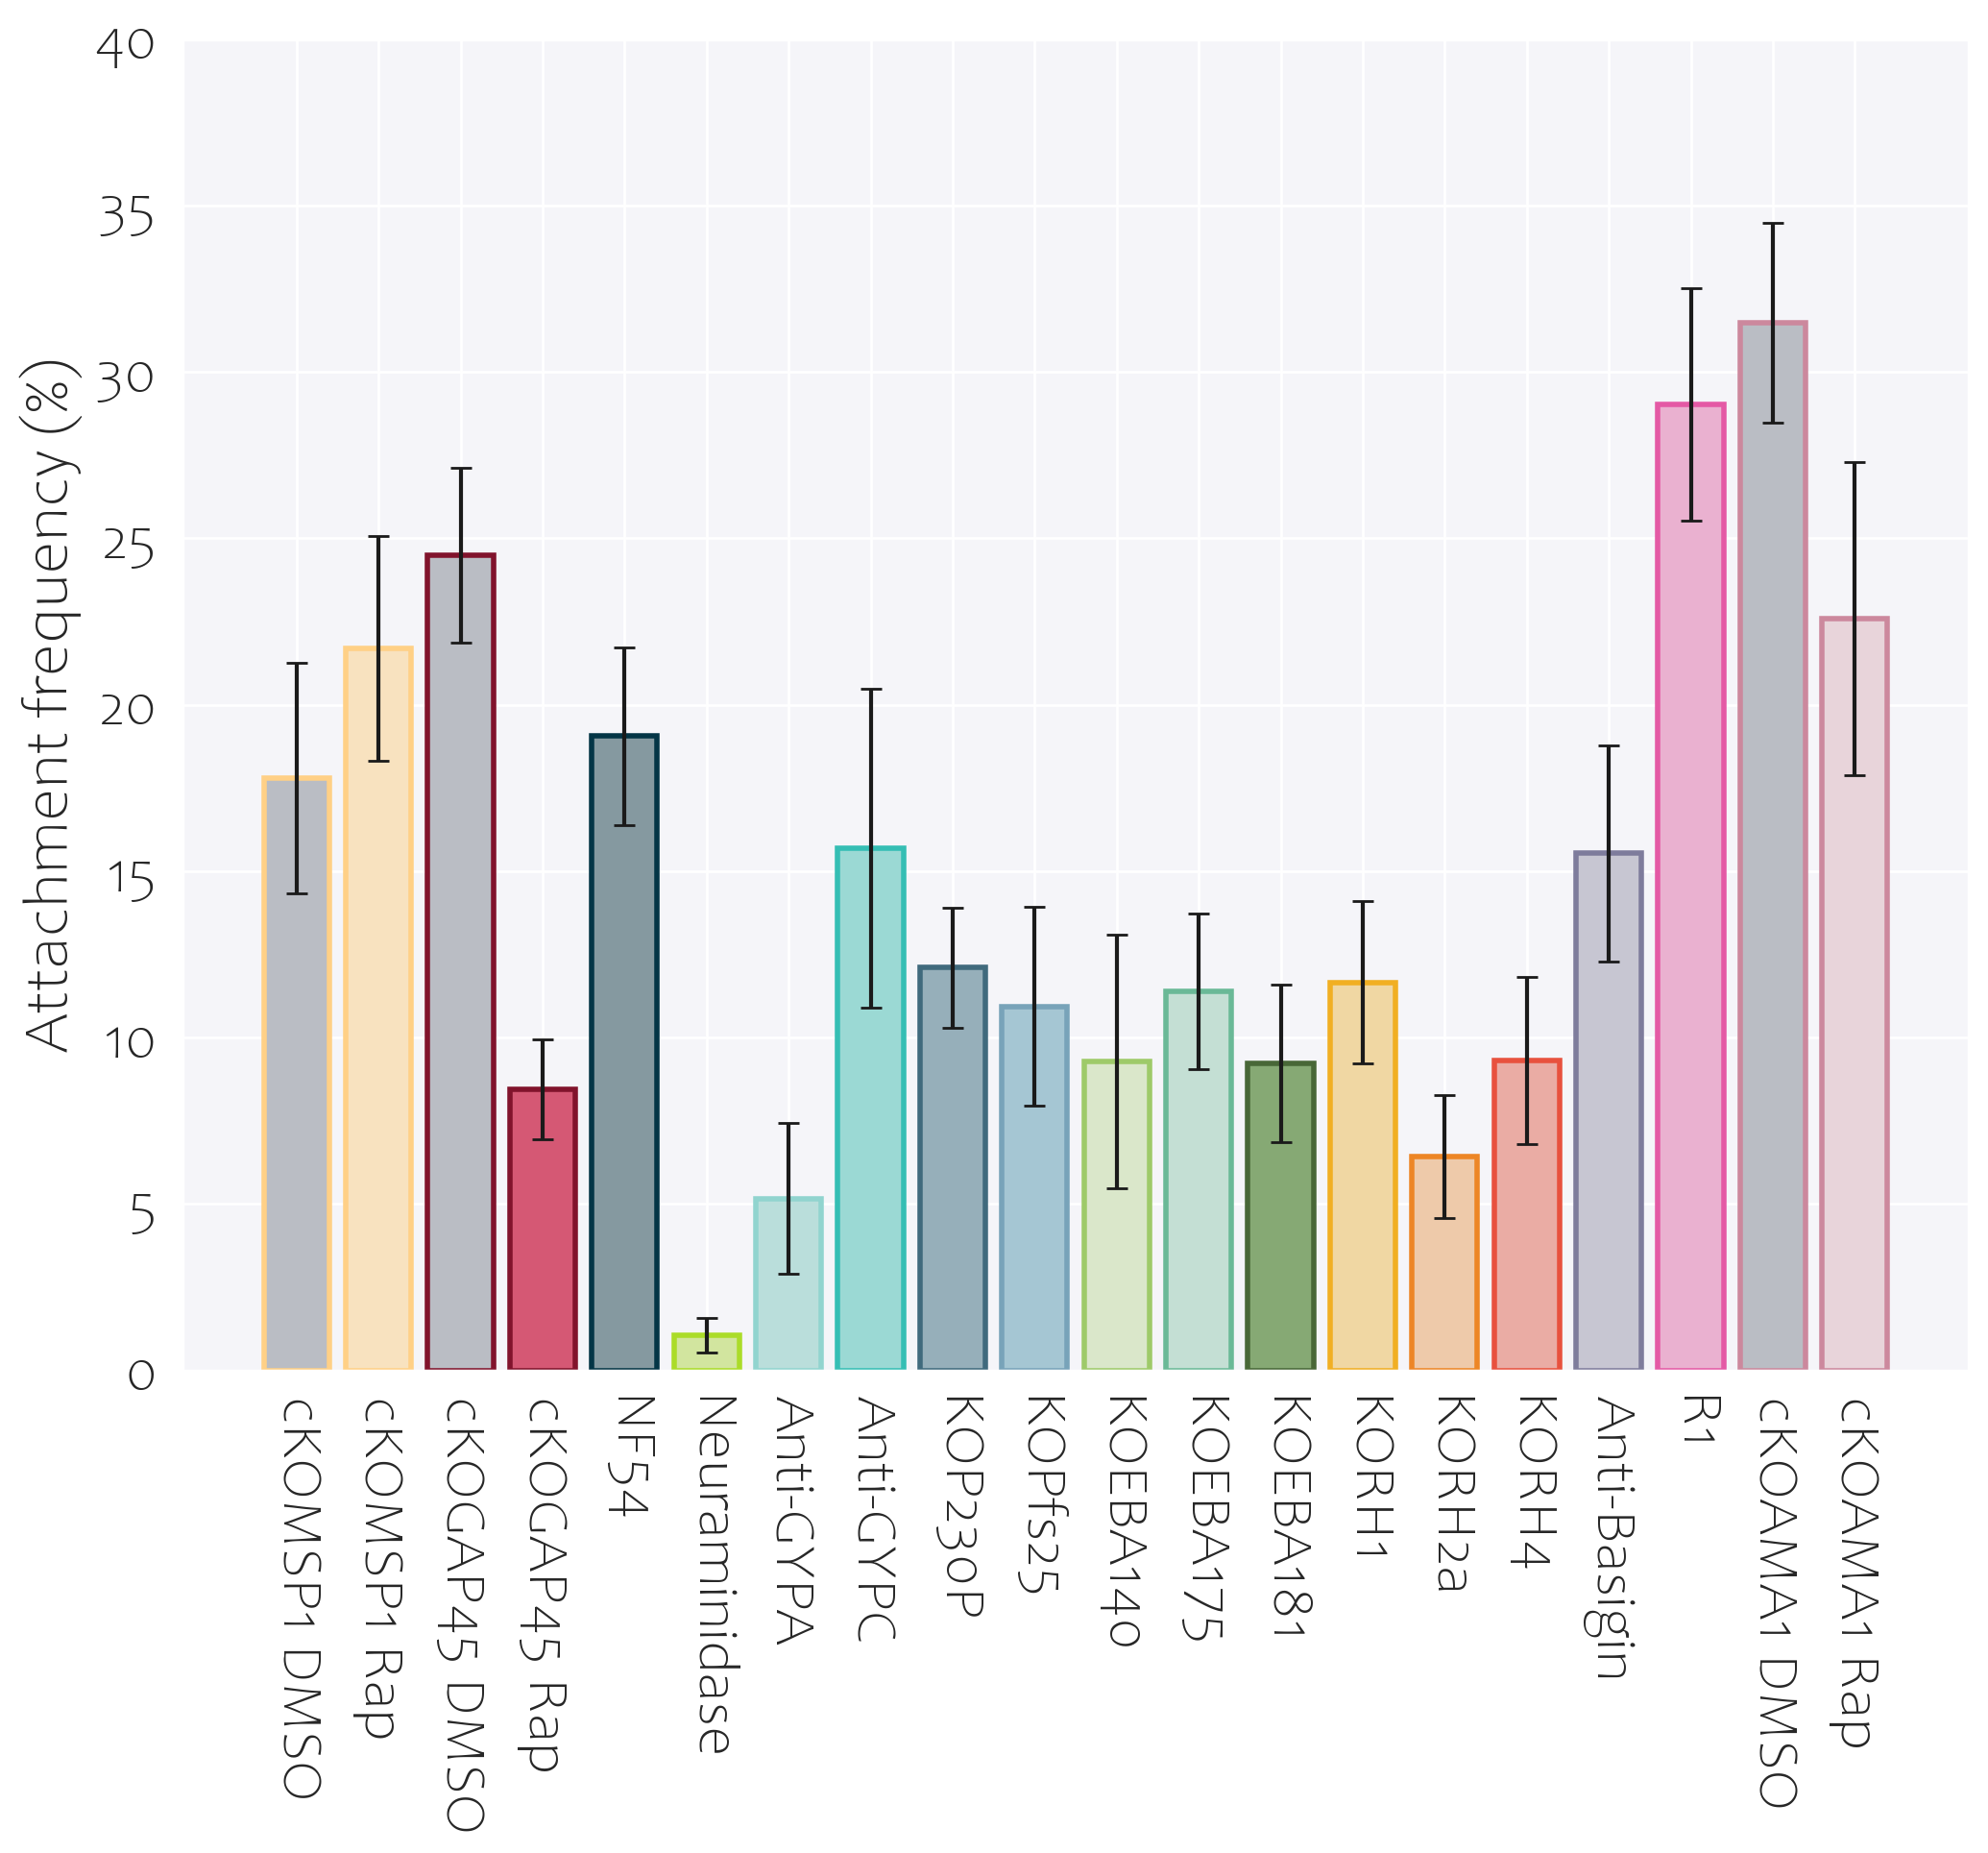

In [7]:
# Plot frequency

plt.figure()
## size of plot
# plt.gcf().set_size_inches(4,9)
plt.gcf().set_size_inches(12,9)
#plt.gcf().set_size_inches(15,7)
# plt.gcf().set_size_inches(18,9)
plt.gcf().set_dpi(200)

#plot per egress 
plt.bar(
    df_freq.index, 
    df_freq['Mean attached per egress'], 
    yerr=df_freq['SEM of atatched per egress'], 
    capsize=4,
    color=[sns.desaturate(colors_light.get(s, 'r'), 0.8) for s in df_freq.index],
    edgecolor=[colors_dark.get(s, 'r') for s in df_freq.index],
    linewidth=2,
)


#plot overall percentage 
# plt.bar(
#     df_freq.index, 
#     df_freq['Percentage '], 
#     color=[sns.desaturate(colors_light.get(s, 'r'), 0.5) for s in df_freq.index],
#     edgecolor=[colors_dark.get(s, 'r') for s in df_freq.index],
# )

# plt.ylabel('Overall attachment frequency (%)')
plt.ylabel('Attachment frequency (%)')
sns.set_theme(context='notebook', style='darkgrid', font='Candara', font_scale=2, color_codes=True, rc=None)
sns.set_style(rc = {'axes.facecolor': '#F5F5F9'})
#sns.set_style(rc = {'axes.facecolor': '#FBF9F6'})
plt.xticks(rotation=-90)

plt.ylim((0,40))
plt.legend([],[], frameon=False)

plt.savefig(f'graphs/tweezer attachment force.png', bbox_inches='tight')


In [8]:
from scipy import stats

# returns true if normally distributed with 5% significance level
def adtest(x):
    test = stats.anderson(x)
    return test.statistic < test.significance_level[2]

controls = [
    #   'NF54', 
    # '3D7',
    # 'KOP230P', 
    # 'KOPfs25',
    #  'Anti-GYPA',
    #  'cKOMSP1 DMSO',
    # 'KOEBA140',
    #'KORH2a'
    # 'cKOGAP45 DMSO',
#    'cKOAMA1 DMSO',
   'KOEBA175'
]

control_datapoints = df_force_plot.query('Condition == @controls')['Detachment force (pN)']
NF54_normally_ditributed = adtest(control_datapoints)

print(f'Controls: {", ".join(control_datapoints.index.unique())}')

for strain, dfqq in df_force_plot.query('Condition != @controls').groupby('Condition'):
    b = dfqq['Detachment force (pN)']
    if NF54_normally_ditributed and adtest(b):
        p_val = stats.ttest_ind(control_datapoints, b).pvalue
        print(f'{strain:15s} ttest p-value = {p_val:.4f}, {"significant" if p_val < 0.05 else "not significant"}')

    else:
        print(strain, 'ranksums=', stats.ranksums(control_datapoints, b))

Controls: KOEBA175
Anti-Basigin    ttest p-value = 0.9345, not significant
Anti-GYPA       ttest p-value = 0.0001, significant
Anti-GYPC       ttest p-value = 0.0005, significant
KOEBA140        ttest p-value = 0.0453, significant
KOEBA181        ttest p-value = 0.0076, significant
KOP230P         ttest p-value = 0.0508, not significant
KOPfs25         ttest p-value = 0.0558, not significant
KORH1           ttest p-value = 0.0071, significant
KORH2a          ttest p-value = 0.2379, not significant
KORH4           ttest p-value = 0.0002, significant
NF54            ttest p-value = 0.0048, significant
Neuraminidase   ttest p-value = 0.0086, significant
R1              ttest p-value = 0.5704, not significant
cKOAMA1 DMSO    ttest p-value = 0.1070, not significant
cKOAMA1 Rap     ttest p-value = 0.3839, not significant
cKOGAP45 DMSO   ttest p-value = 0.7689, not significant
cKOGAP45 Rap    ttest p-value = 0.9781, not significant
cKOMSP1 DMSO    ttest p-value = 0.5643, not significant
cKOMS